In [14]:
%reset -f
import numpy as np
import torch
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import gym

from gym.envs.toy_text.frozen_lake import generate_random_map

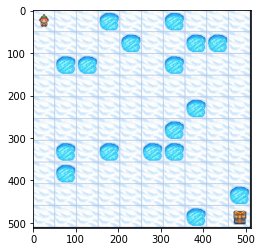

In [54]:
size = 10
env =gym.make('FrozenLake-v1', desc=generate_random_map(size=size), map_name=None, is_slippery=False)
env.reset()
plt.imshow(env.render(mode="rgb_array"))

In [55]:
action_values = np.zeros(shape=(size**2,4))

In [56]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))
    
def exploratory_policy(state):
    return np.random.randint(4)

In [57]:
def q_learning(action_values, exploratory_policy, target_policy, episodes, alpha=0.1, gamma=0.99):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        done = False
        while not done:
            action = exploratory_policy(state)
            next_state, reward, done, _ = env.step(action)
            next_action = target_policy(next_state)
            
            qsa = action_values[state][action]
            next_qsa = action_values[next_state][next_action]
            action_values[state][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            state = next_state
            action = next_action

In [63]:
q_learning(action_values, exploratory_policy, target_policy, 100000)

In [64]:
np.argmax(action_values,axis=1).reshape(size,size)

array([[1, 0, 0, 0, 2, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [2, 1, 2, 1, 1, 0, 0, 0, 0, 0],
       [2, 2, 2, 2, 1, 0, 0, 0, 0, 0],
       [3, 0, 3, 0, 1, 0, 0, 1, 1, 0],
       [3, 0, 2, 2, 2, 1, 2, 1, 1, 0],
       [2, 2, 2, 2, 2, 2, 2, 2, 1, 0],
       [2, 2, 2, 3, 3, 3, 3, 0, 2, 0]])

In [43]:
 # - 0: LEFT
 #    - 1: DOWN
 #    - 2: RIGHT
 #    - 3: UP

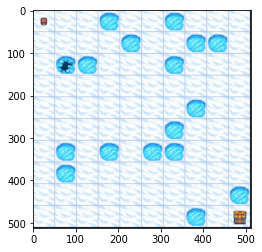

In [65]:
plt.imshow(env.render(mode="rgb_array"))

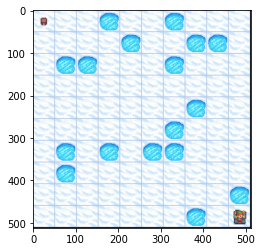

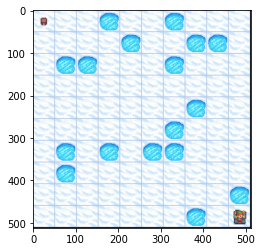

In [66]:
import time
state = env.reset()
done = False
while not done:
    plt.cla()
    action = target_policy(state)

    state, reward, done, _ = env.step(action)

    plt.imshow(env.render(mode="rgb_array"))
    time.sleep(0.1)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.gcf()